<a href="https://colab.research.google.com/github/23adnan/Portfolio-Project/blob/main/Network_Anomaly_Detection_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv("/content/drive/MyDrive/Portfolio Project/Network_anomaly_data.csv")

## High level overview of the dataset

#### Inspect the first few rows of the dataset

In [102]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [103]:
df.shape

(125973, 43)

#### Get basic info of the dataset

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

**Insight:**

Datatypes are assigned correctly no changes requried

## Summary statistics

In [105]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
duration,125973.0,NaN,NaN,NaN,287.14465,2604.51531,0.0,0.0,0.0,0.0,42908.0
protocoltype,125973,3,tcp,102689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service,125973,70,http,40338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flag,125973,11,SF,74945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
srcbytes,125973.0,NaN,NaN,NaN,45566.743,5870331.181894,0.0,0.0,44.0,276.0,1379963888.0
dstbytes,125973.0,NaN,NaN,NaN,19779.114421,4021269.151441,0.0,0.0,0.0,516.0,1309937401.0
land,125973.0,NaN,NaN,NaN,0.000198,0.014086,0.0,0.0,0.0,0.0,1.0
wrongfragment,125973.0,NaN,NaN,NaN,0.022687,0.25353,0.0,0.0,0.0,0.0,3.0
urgent,125973.0,NaN,NaN,NaN,0.000111,0.014366,0.0,0.0,0.0,0.0,3.0
hot,125973.0,NaN,NaN,NaN,0.204409,2.149968,0.0,0.0,0.0,0.0,77.0


Insights:
1. Most connections have a duration of 0, with a mean duration of approximately 287 seconds. This could indicate many short-lived connections or that the dataset might be skewed with a large number of very short or failed connections.
2. The majority of connections use TCP (102,689 out of 125,973), which is a common protocol for network communications.
3. The most common service is HTTP, used in 40,338 connections, which suggests that web traffic is a significant part of the dataset.
4. The most frequent flag is SF (74945 occurrences), which might be indicative of normal connections without errors or unusual flags.
5. The feature 'numoutboundcmds' has a constant value of 0 across all entries and should be dropped from the dataset as it provides no additional information for model training.

#### dropping the column 'numoutboundcmds'

In [106]:
df['numoutboundcmds'].value_counts()

,count
numoutboundcmds,
0,125973


In [107]:
df.drop(columns=['numoutboundcmds'], inplace=True)

#### Checking for missing values

In [108]:
df.isna().sum()

,0
duration,0
protocoltype,0
service,0
flag,0
srcbytes,0
dstbytes,0
land,0
wrongfragment,0
urgent,0
hot,0


Insights: no missing values present in the dataset

In [109]:
df.duplicated().any()

False

no duplicated data present.

## EDA

#### Frequency distribution for categorical features.

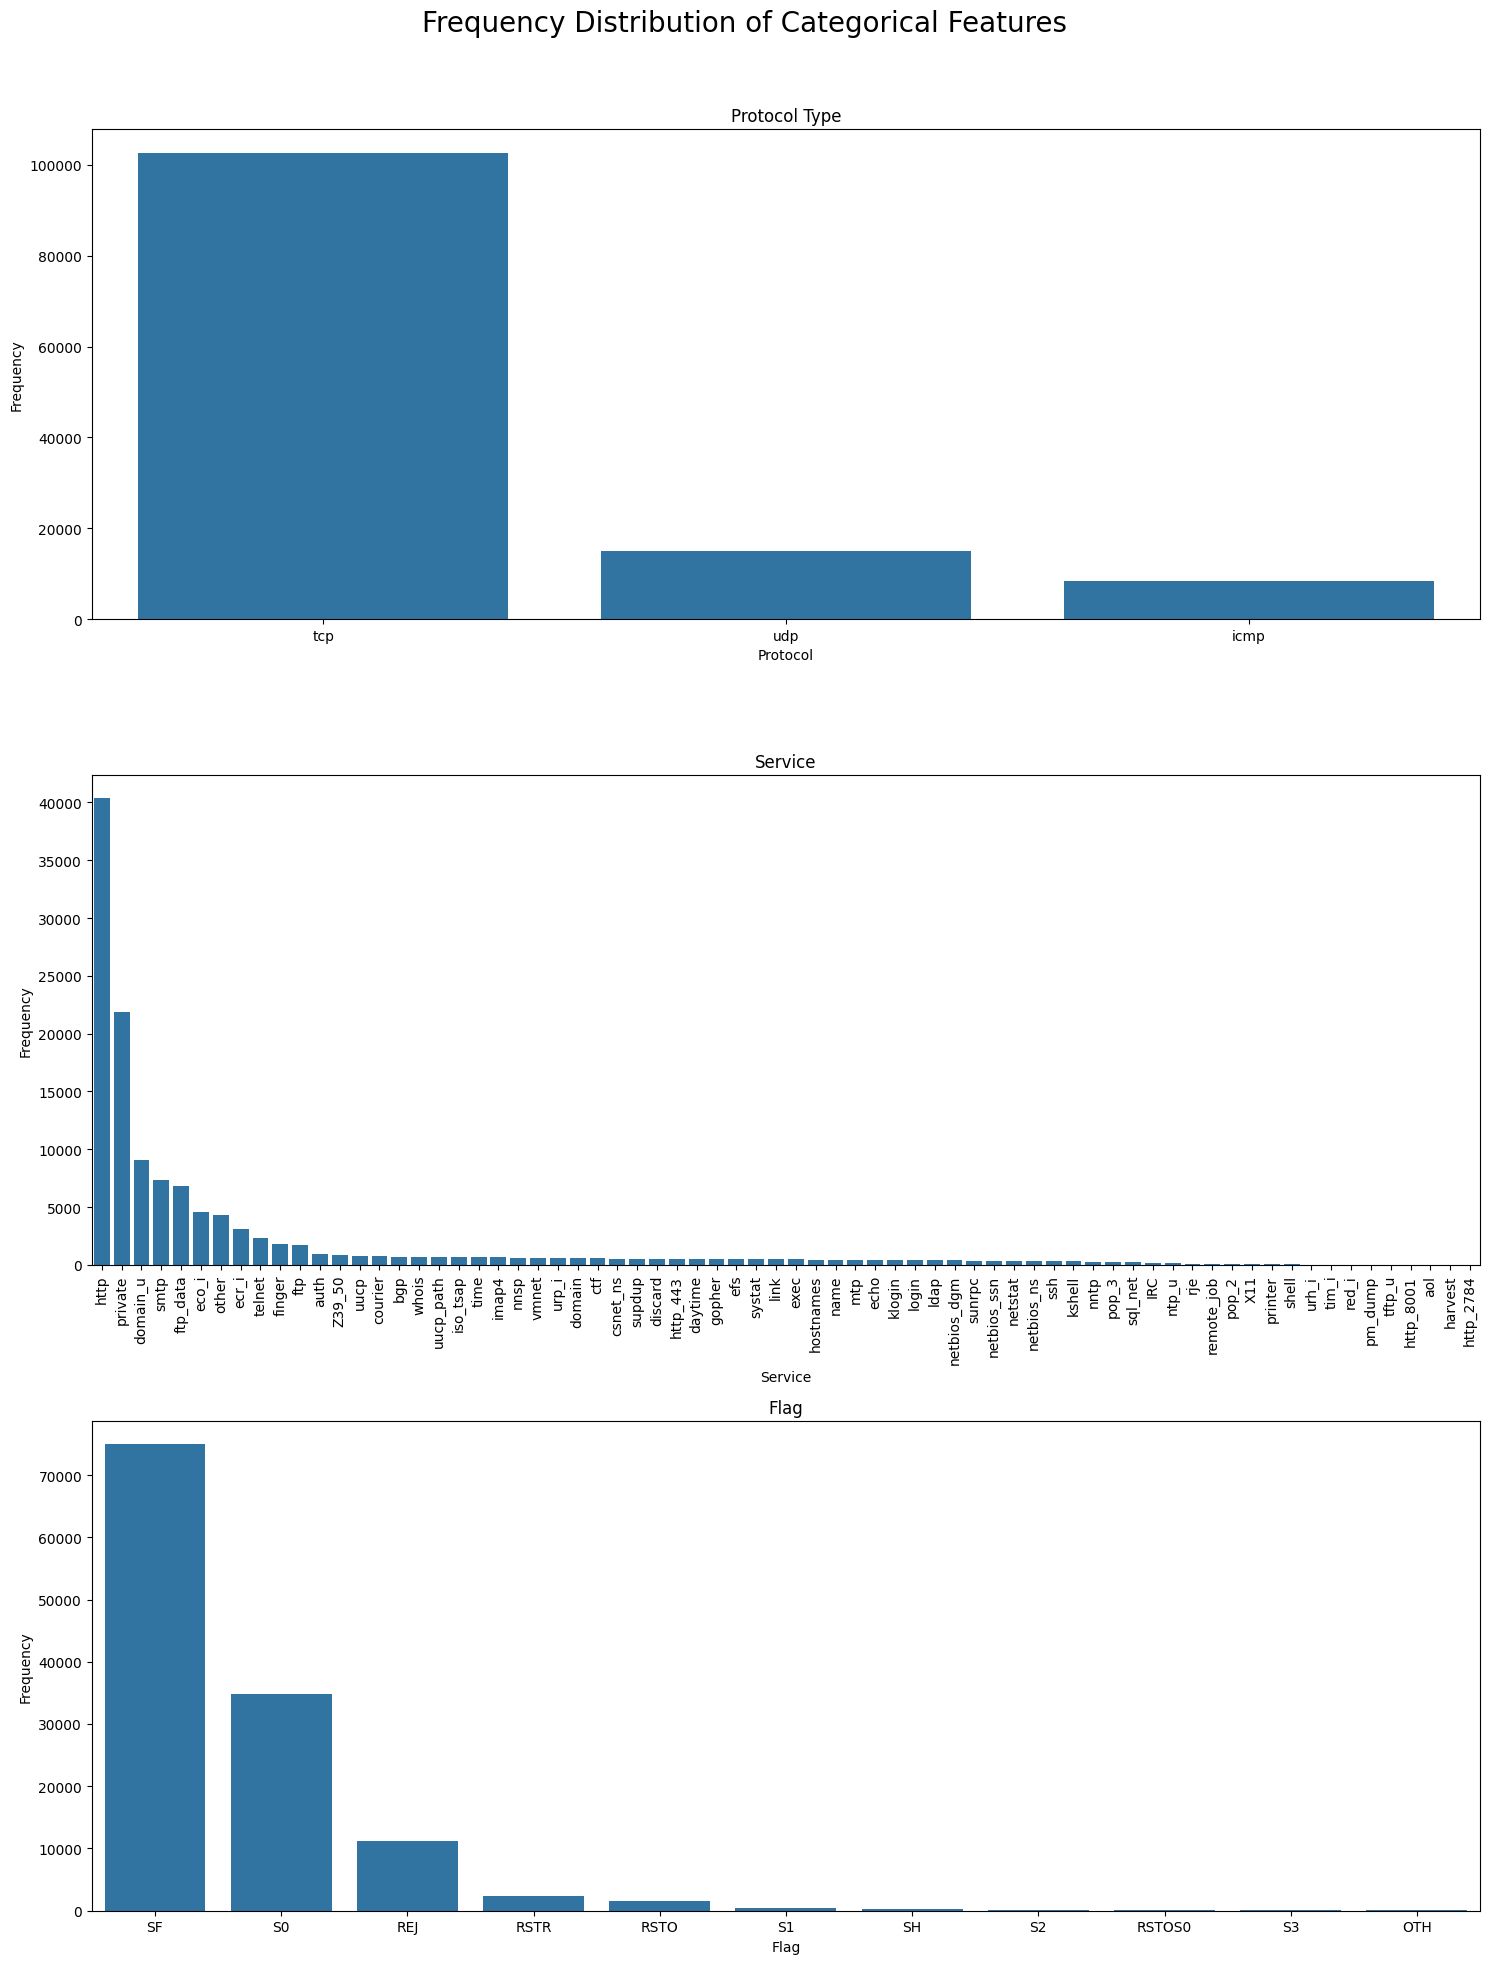

In [110]:
# frequency distribution of protocoltype, service, flag
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))
fig.suptitle('Frequency Distribution of Categorical Features', fontsize=20)

# Protocol type
sns.countplot(data=df, x='protocoltype', ax=axes[0], order=df['protocoltype'].value_counts().index)
axes[0].set_title('Protocol Type')
axes[0].set_xlabel('Protocol')
axes[0].set_ylabel('Frequency')

# Service
sns.countplot(data=df, x='service', ax=axes[1], order=df['service'].value_counts().index)
axes[1].set_title('Service')
axes[1].set_xlabel('Service')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=90)

# Flag
sns.countplot(data=df, x='flag', ax=axes[2], order=df['flag'].value_counts().index)
axes[2].set_title('Flag')
axes[2].set_xlabel('Flag')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#### Histograms of the numerical features

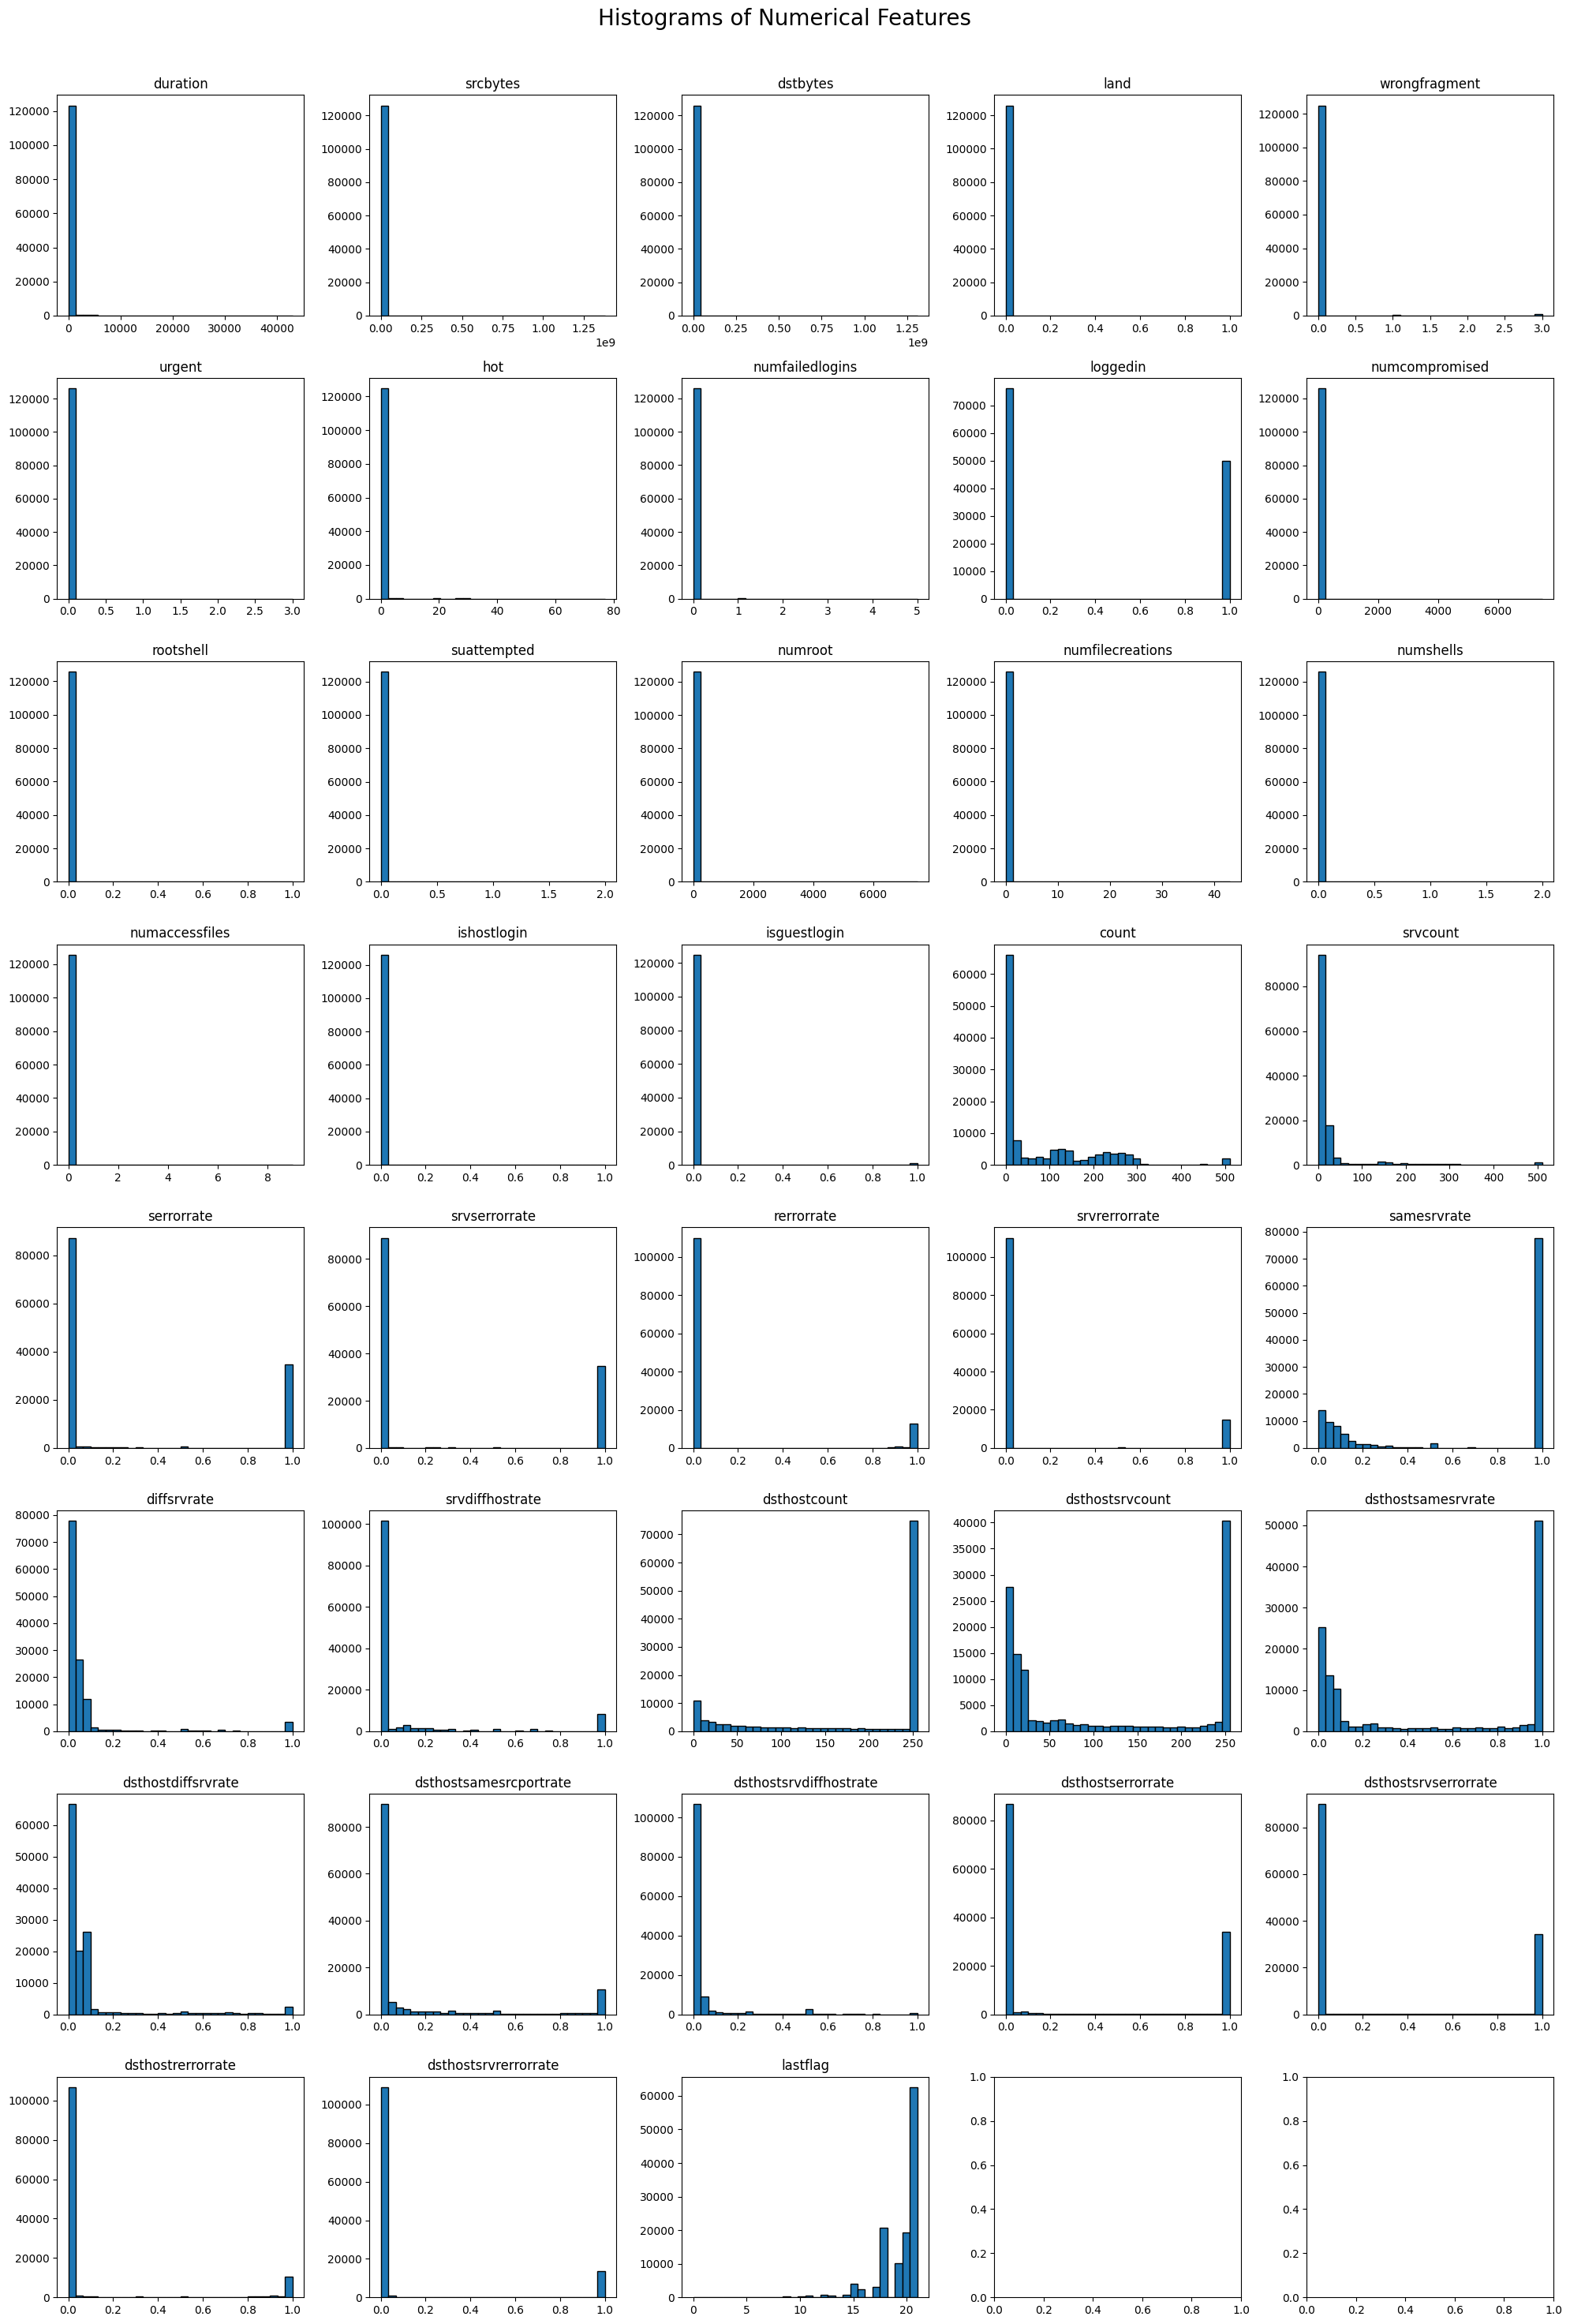

In [111]:
# histograms of the numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical features
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 30))
fig.suptitle('Histograms of Numerical Features', fontsize=20)

for i, col in enumerate(numerical_features):
    ax = axes[i // 5, i % 5]
    ax.hist(df[col], bins=30, edgecolor='k')
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### Box plots of numerical features

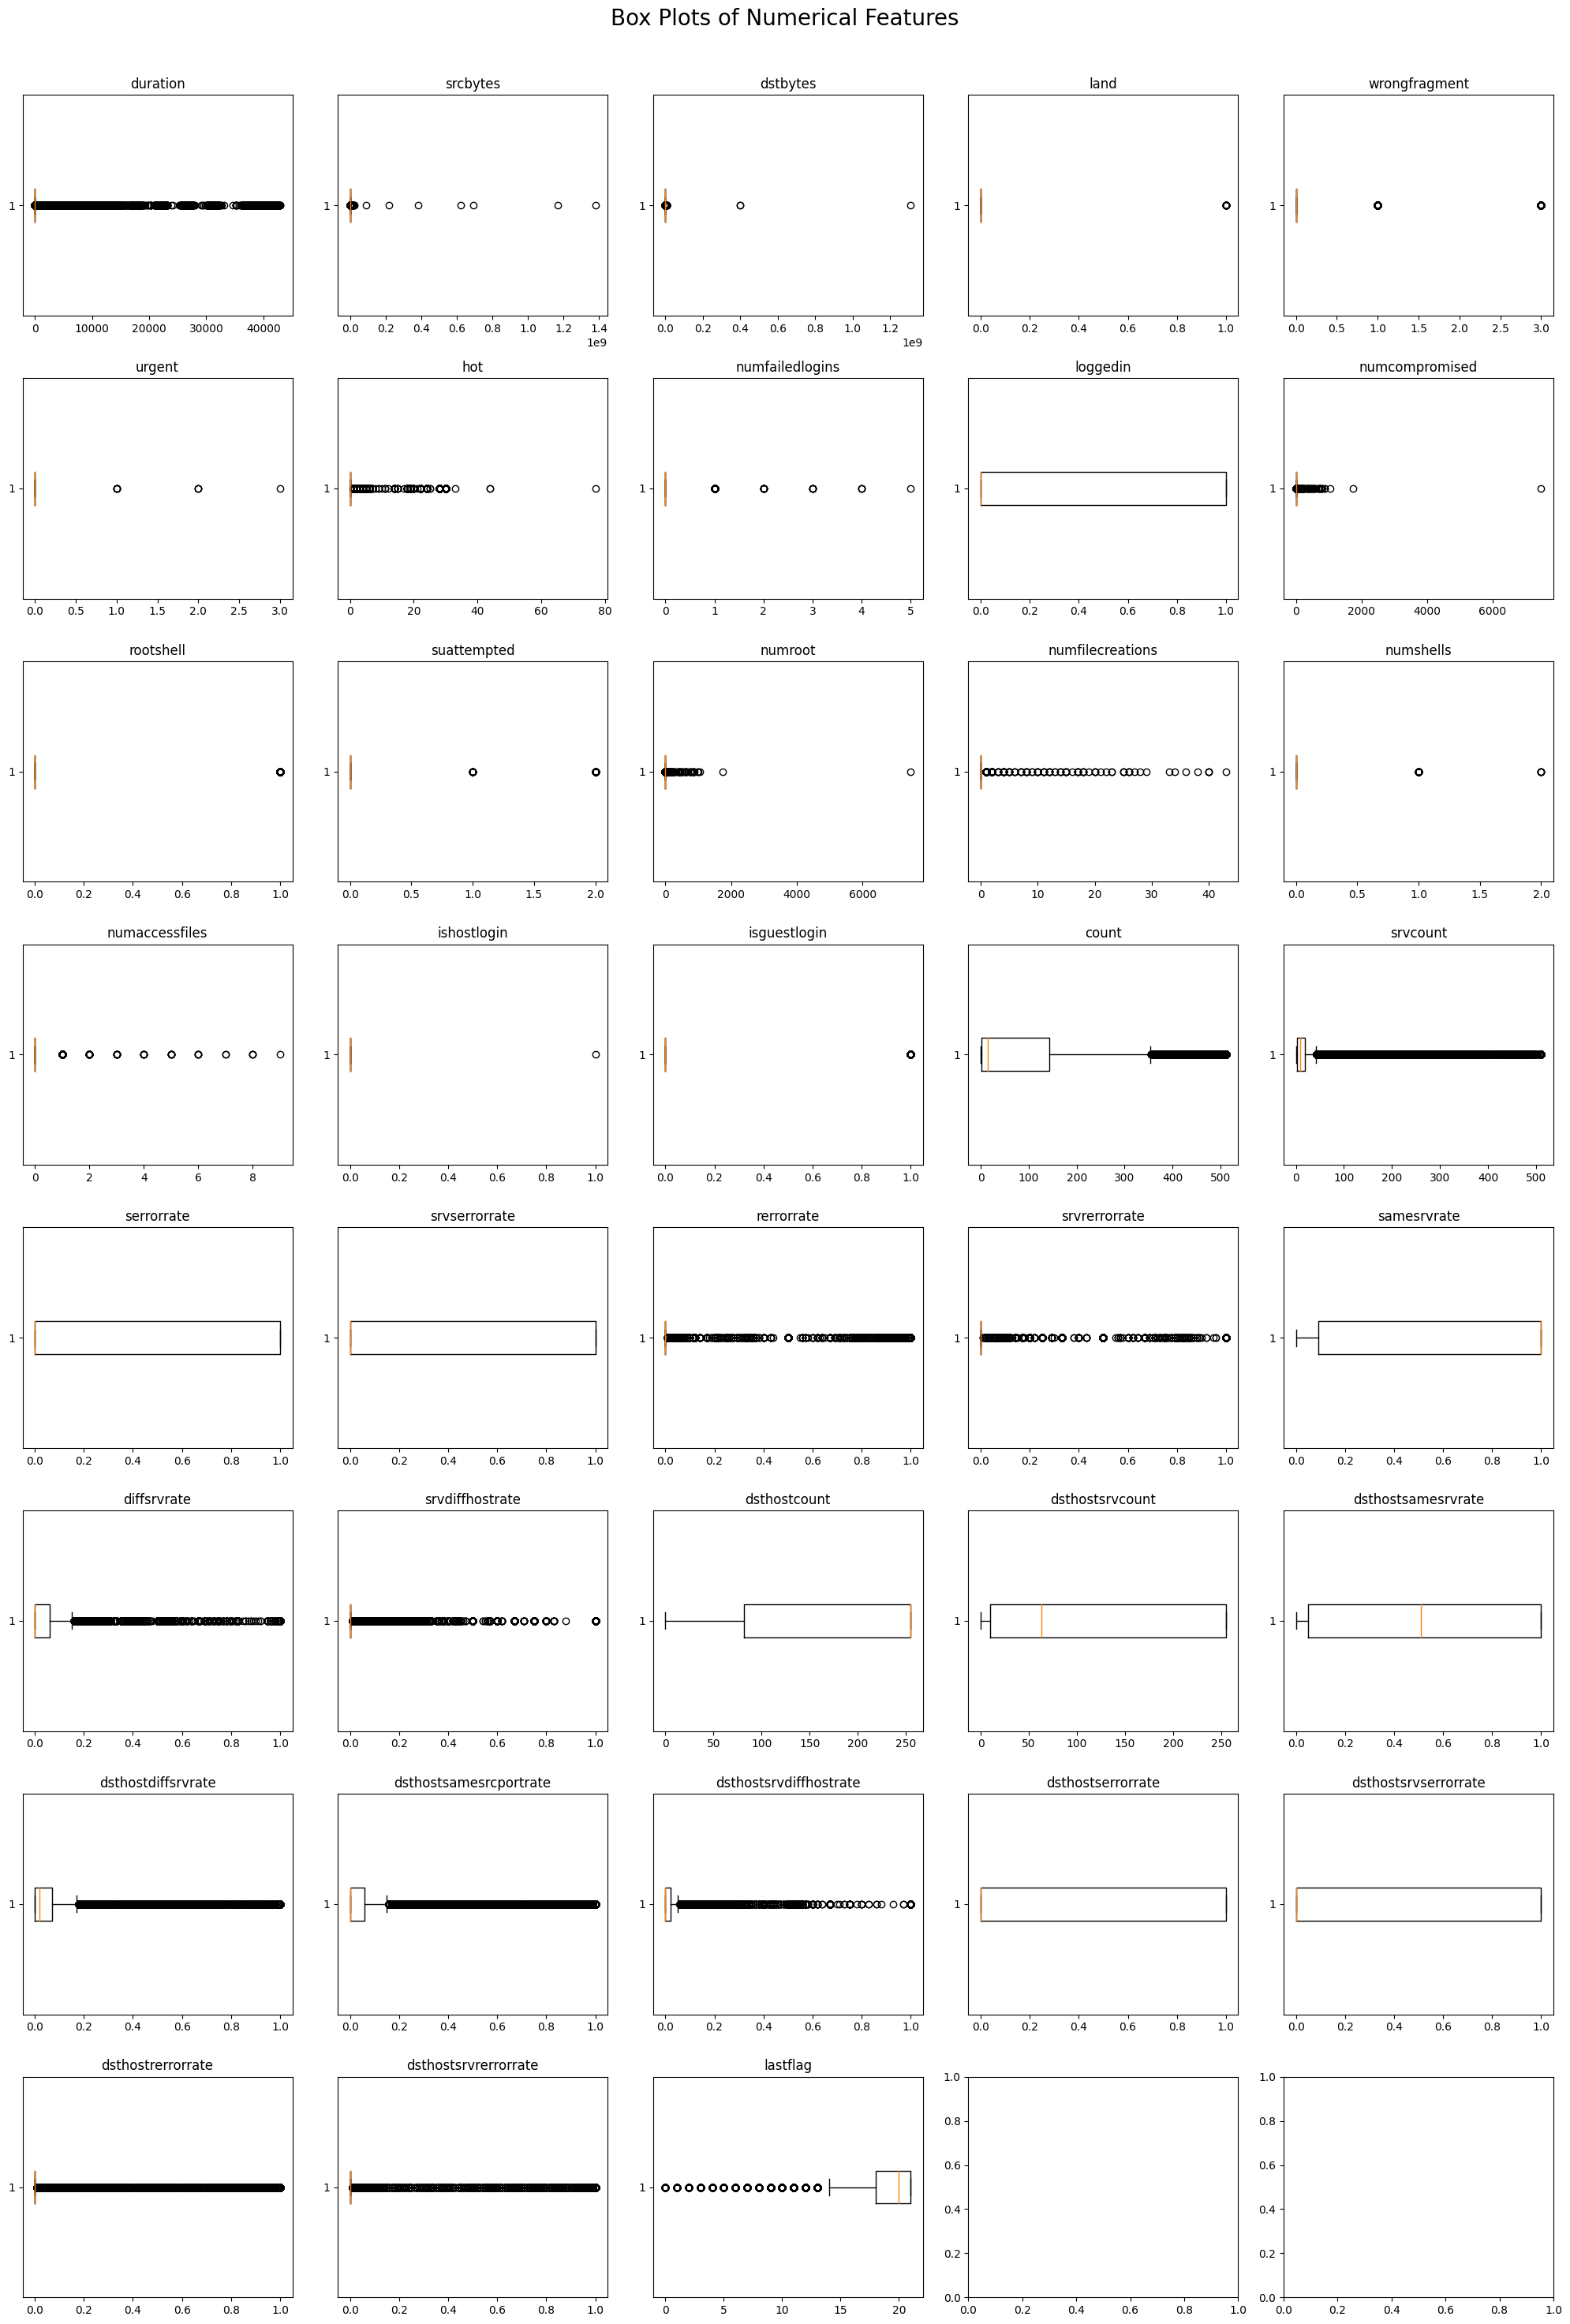

In [112]:
# box plots of numerical features
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 30))
fig.suptitle('Box Plots of Numerical Features', fontsize=20)

for i, col in enumerate(numerical_features):
    ax = axes[i // 5, i % 5]
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

#### Frequency distribution of normal vs. anomalous connections

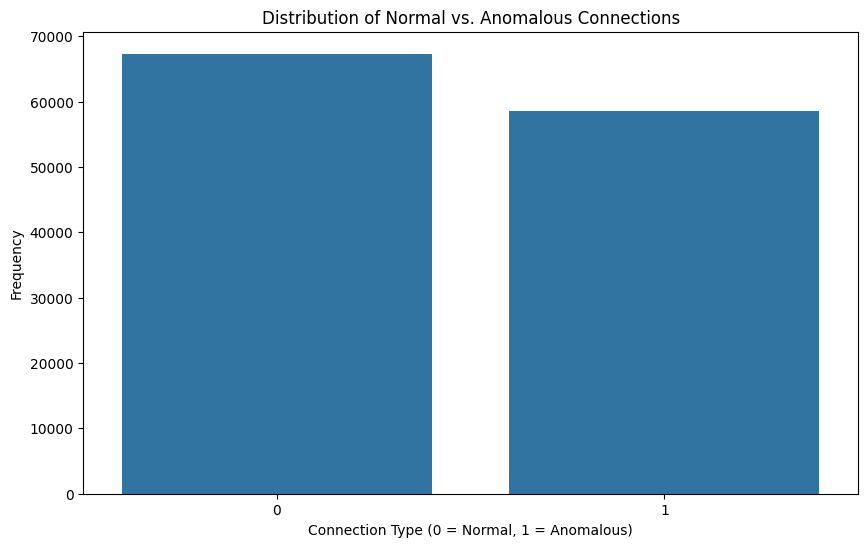

In [113]:
# frequency distribution of normal vs. anomalous connections
unique_attacks = df['attack'].unique()

# Create a binary column 'is_anomalous': 0 for normal, 1 for anomalous
df['is_anomalous'] = df['attack'].apply(lambda x: 0 if x == 'normal' else 1)

# Plot the distribution of normal vs. anomalous connections
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='is_anomalous')
plt.title('Distribution of Normal vs. Anomalous Connections')
plt.xlabel('Connection Type (0 = Normal, 1 = Anomalous)')
plt.ylabel('Frequency')
plt.show()

#### correlation of numerical features

<Axes: >

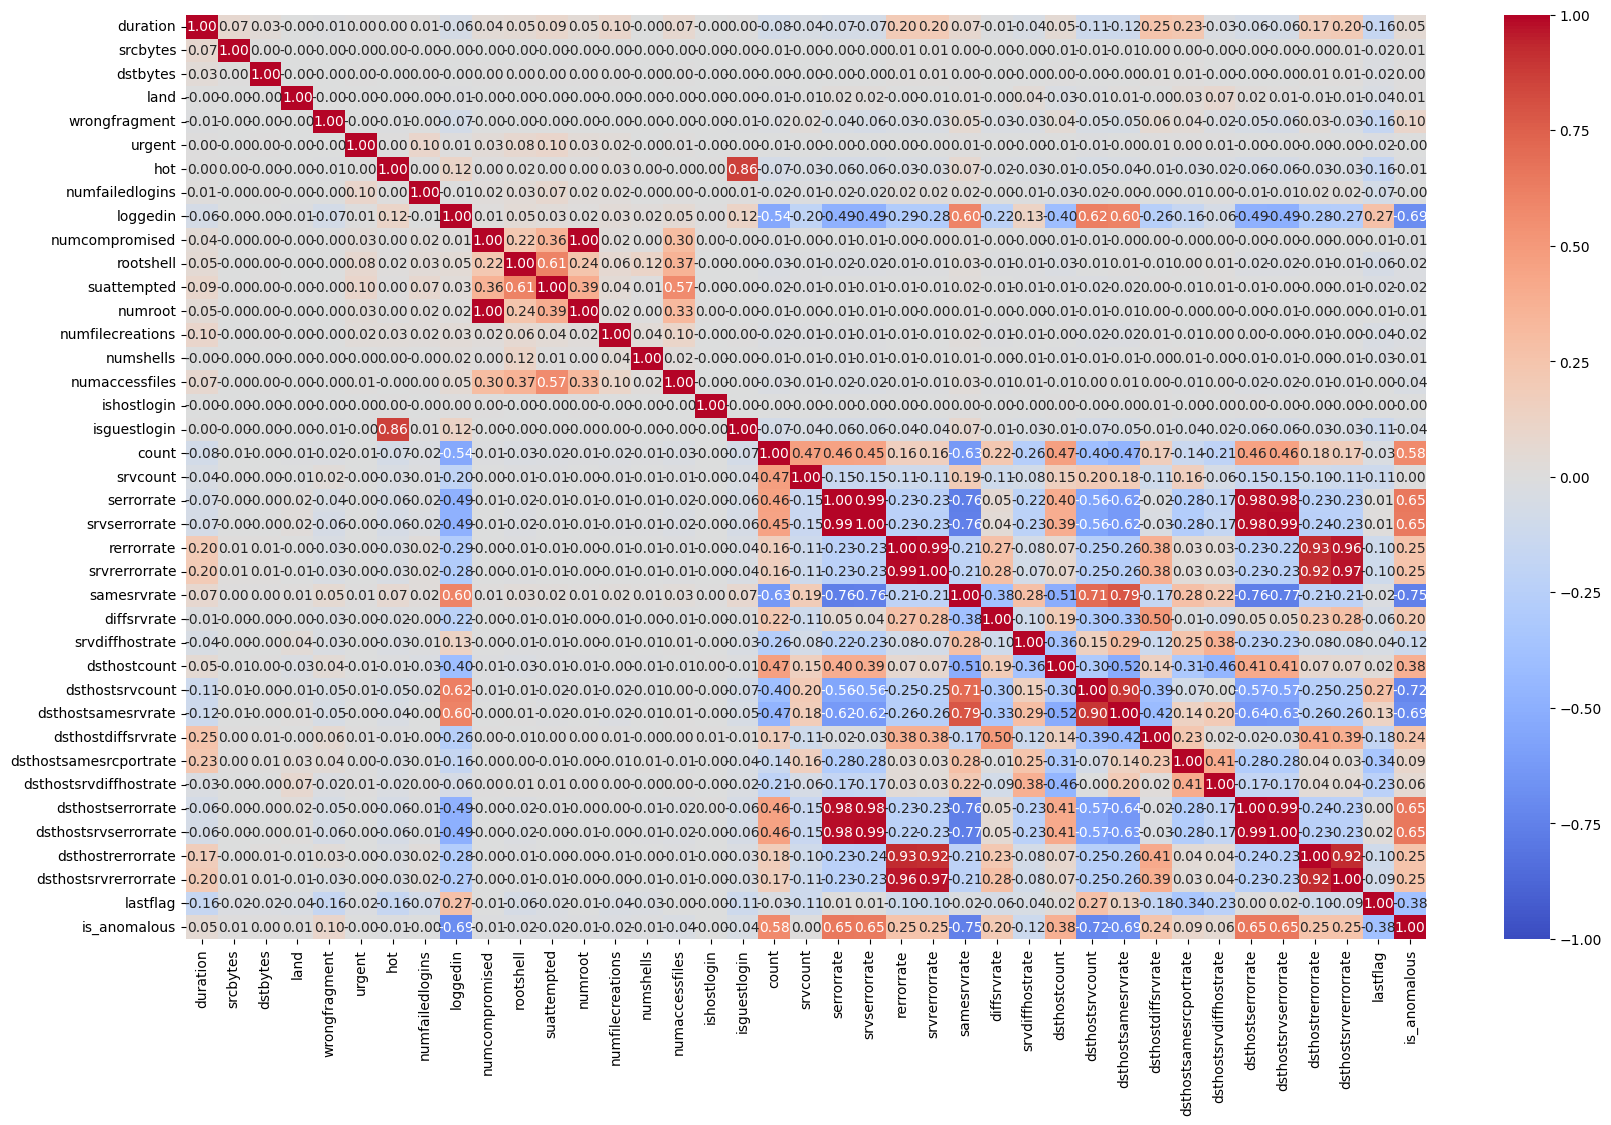

In [114]:
# correlation heatmap
plt.figure(figsize=(20, 12))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

In [115]:
threshold = 0.95

# Identify pairs of highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Create a DataFrame to display the pairs
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Display the DataFrame
print("Highly Correlated Feature Pairs:")
print(high_corr_df)

Highly Correlated Feature Pairs:
              Feature 1          Feature 2  Correlation
0               numroot     numcompromised     0.998833
1         srvserrorrate         serrorrate     0.993289
2         srvrerrorrate         rerrorrate     0.989008
3     dsthostserrorrate         serrorrate     0.979373
4     dsthostserrorrate      srvserrorrate     0.977596
5  dsthostsrvserrorrate         serrorrate     0.981139
6  dsthostsrvserrorrate      srvserrorrate     0.986252
7  dsthostsrvserrorrate  dsthostserrorrate     0.985052
8  dsthostsrvrerrorrate         rerrorrate     0.964449
9  dsthostsrvrerrorrate      srvrerrorrate     0.970208


In [116]:
# Display the frequent services
service_counts = df['service'].value_counts()
frequent_services = service_counts[service_counts > 1000]
print(frequent_services)

service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
eco_i        4586
other        4359
ecr_i        3077
telnet       2353
finger       1767
ftp          1754
Name: count, dtype: int64


In [117]:
df['attack'].value_counts()

,count
attack,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


## hypothesis testing

In [118]:
# Separate normal and anomalous data
normal_data = df[df['is_anomalous'] == 0]
anomalous_data = df[df['is_anomalous'] == 1]

#### 1. Network Traffic Volume and Anomalies
**Hypothesis:** Network connections with unusually high or low traffic volume (bytes transferred) are more likely to be anomalous.

- Null Hypothesis (H0): There is no significant difference in the mean values of src_bytes and dst_bytes between normal and anomalous connections.
- Alternative Hypothesis (H1): There is a significant difference in the mean values of src_bytes and dst_bytes between normal and anomalous connections.

In [119]:
# t-test for Src_bytes
t_stat, p_value = stats.ttest_ind(normal_data['srcbytes'], anomalous_data['srcbytes'], equal_var=False)
print(f"t-test for Src_bytes: t_stat={t_stat}, p_value={p_value}")

# t-test for Dst_bytes
t_stat, p_value = stats.ttest_ind(normal_data['dstbytes'], anomalous_data['dstbytes'], equal_var=False)
print(f"t-test for Dst_bytes: t_stat={t_stat}, p_value={p_value}")

t-test for Src_bytes: t_stat=-1.9616326188727324, p_value=0.049809977020307705
t-test for Dst_bytes: t_stat=-1.3636319854318106, p_value=0.17268865455671056


**Inference:**
- The p-value is just below the 0.05 significance level, suggesting that there is marginal evidence to reject the null hypothesis. Therefore, src_bytes shows a marginally significant difference between normal and anomalous connections, indicating that traffic volume (in terms of src_bytes) might contribute to identifying anomalies.
- The p-value is greater than 0.05, suggesting that there is not enough evidence to reject the null hypothesis. Thus, dst_bytes does not show a significant difference between normal and anomalous connections in this context.

#### 2. Impact of Protocol Type on Anomaly Detection
**Hypothesis:** Certain protocols are more frequently associated with network anomalies.

- Null Hypothesis (H0): The distribution of protocol type is independent of whether a connection is normal or anomalous.
- Alternative Hypothesis (H1): The distribution of protocol type differs between normal and anomalous connections.

In [120]:
from scipy.stats import chi2_contingency

# Contingency table for Protocol_type
contingency_table = pd.crosstab(df['protocoltype'], df['is_anomalous'])

# Chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square test for Protocol_type: chi2={chi2}, p_value={p}")

Chi-square test for Protocol_type: chi2=10029.24862778463, p_value=0.0


**Inference:**
- The p-value is extremely small, indicating a highly significant result. This suggests that the distribution of protocol_type is significantly different between normal and anomalous connections, meaning that certain protocols are more frequently associated with anomalies.

#### 3. Role of Service in Network Security
**Hypothesis:** Specific services are targets of network anomalies more often than others.

- Null Hypothesis (H0): The distribution of service is independent of whether a connection is normal or anomalous.
- Alternative Hypothesis (H1): The distribution of service differs between normal and anomalous connections.

In [121]:
# Contingency table for Service
contingency_table = pd.crosstab(df['service'], df['is_anomalous'])

# Chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square test for Service: chi2={chi2}, p_value={p}")

Chi-square test for Service: chi2=93240.03213516614, p_value=0.0


**Inference:**
- The p-value is extremely small, indicating a highly significant result. This suggests that the distribution of service differs significantly between normal and anomalous connections. Therefore, certain services are more likely to be associated with anomalies.

#### 4. Connection Status and Anomalies
**Hypothesis:** Error flags in the flag feature are significantly associated with anomalies.

- Null Hypothesis (H0): Error flags in the flag feature do not have a significant effect on the likelihood of an anomaly.
- Alternative Hypothesis (H1): Error flags in the flag feature significantly affect the likelihood of an anomaly.

In [122]:
import statsmodels.api as sm

# Create dummy variables for flag
flag_dummies = pd.get_dummies(df['flag'], drop_first=True)

# Prepare the logistic regression model
X = pd.concat([df[['srcbytes', 'dstbytes']], flag_dummies], axis=1)
y = df['is_anomalous']
X = sm.add_constant(X)  # Add constant term
# Convert boolean columns to integers
boolean_columns = ['REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']
X[boolean_columns] = X[boolean_columns].astype(int)


# Fit the model
model = sm.Logit(y, X).fit()

# Display the model summary
print(model.summary())

         Current function value: 0.330663
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:           is_anomalous   No. Observations:               125973
Model:                          Logit   Df Residuals:                   125960
Method:                           MLE   Df Model:                           12
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.5213
Time:                        22:23:20   Log-Likelihood:                -41655.
converged:                      False   LL-Null:                       -87016.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1570      0.346      3.347      0.001       0.480       1.835
srcbytes    9.507e-08   3.08e-08      3.086      0.002    3.47e-08    1.55e-07
dstbytes    2.125e-07   8.56e-08      2.483      0.0

**Inference:**
- The logistic regression model suggests that srcbytes and dstbytes are significant predictors of anomalies.
- RSTR, S0, S1, S2, S3, SF, SH all have very low p-values (0.000), indicating strong evidence against the null hypothesis that their coefficients are zero. This suggests that these flags are significant predictors of anomalies.
- REJ has a p-value of 0.993, indicating no significant effect on anomalies. RSTO and RSTOS0 have p-values above 0.05, which suggests they are not significant predictors in this model.

#### 5. Influence of Urgent Packets
**Hypothesis:** Connections that include urgent packets are more likely to be anomalous.

- Null Hypothesis (H0): The presence of urgent packets does not affect the likelihood of a connection being anomalous.
- Alternative Hypothesis (H1): The presence of urgent packets increases the likelihood of a connection being anomalous.

In [123]:
# Prepare the logistic regression model
X = df[['urgent']]
y = df['is_anomalous']
X = sm.add_constant(X)  # Add constant term

# Fit the model
model = sm.Logit(y, X).fit()

# Display the model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.690749
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           is_anomalous   No. Observations:               125973
Model:                          Logit   Df Residuals:                   125971
Method:                           MLE   Df Model:                            1
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:               5.941e-06
Time:                        22:23:21   Log-Likelihood:                -87016.
converged:                       True   LL-Null:                       -87016.
Covariance Type:            nonrobust   LLR p-value:                    0.3092
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1385      0.006    -24.521      0.000      -0.150      -0.127
urgent        -0.4307      0.

**Inference:**
-  The p-value for urgent is much greater than 0.05, indicating that the presence of urgent packets is not a significant predictor of anomalies in this model. This suggests that the presence of urgent packets does not significantly increase the likelihood of a connection being anomalous.


**Summary:**

1. Network Traffic Volume: src_bytes is marginally linked to anomalies, while dst_bytes is not.
2. Protocol Type: Strongly associated with anomalies.
3. Service: Strongly associated with anomalies.
4. Connection Status: several flags are associated with anomalies.
5. Urgent Packets: No significant impact on anomaly prediction.